In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [51]:
def compare_resource_usage(query, run, fname):
    memory_q1_opt = pd.read_csv(f'{query}/opt/resource-usage-{run}.csv')
    memory_q1_ref = pd.read_csv(f'{query}/ref/resource-usage-{run}.csv')
    
    plt.plot(memory_q1_ref['memory_used'] / (1000 * 1000 * 1000))
    plt.plot(memory_q1_opt['memory_used'] / (1000 * 1000 * 1000))
    plt.savefig(f'memory-{fname}.eps')
    plt.show()

    plt.plot(memory_q1_ref['cpu_used'])
    plt.plot(memory_q1_opt['cpu_used'])
    plt.show()

    N = 15
    plt.plot(np.convolve(memory_q1_ref['cpu_used'], np.ones(N)/N, mode='valid'))
    plt.plot(np.convolve(memory_q1_opt['cpu_used'], np.ones(N)/N, mode='valid'))
    plt.savefig(f'cpu15s-{fname}.eps')
    plt.show()

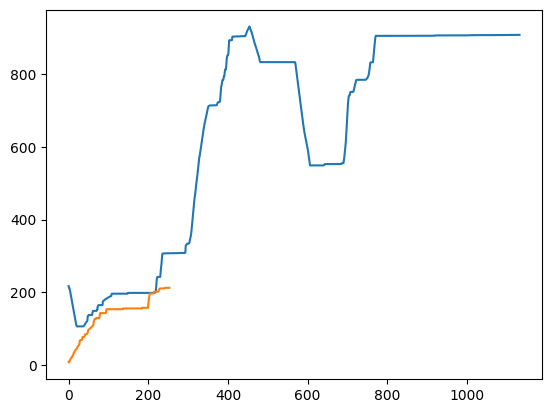

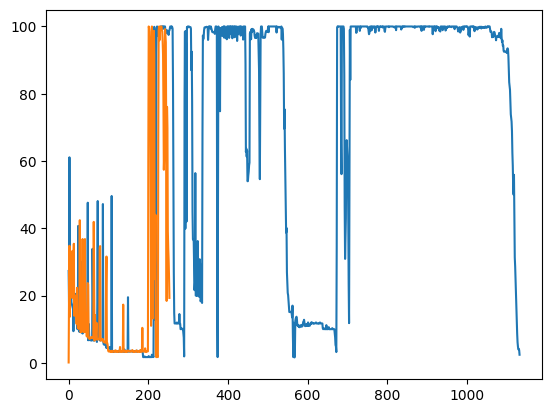

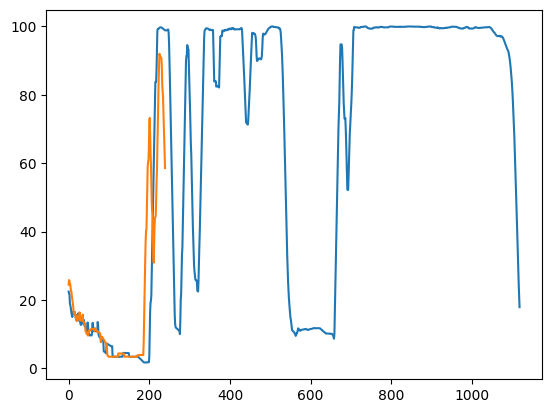

In [52]:
compare_resource_usage('benchmark-results-lsqb/q1.sql', '05', 'q1-sf100')

#compare_resource_usage('benchmark-results-lsqb-sf100/q4.sql')